# 3. Plots

## 3.1 Set up
Everything that we have done is really nice, but without having a way to visualize the results it may feel odd. It's time to learn about plots.

The default plotting package in Julia is called `Plots.jl` and wraps several plotting environments. We can install it with:

In [1]:
using Pkg
Pkg.add("Plots")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %12.4 %>                              ]  24.9 %>                    ]  49.6 %.1 %            ]  68.6 %=================================>       ]  81.0 %]  93.3 % Resolving package versions...
 Installed Combinatorics ───────────── v1.0.0
 Installed Packing ─────────────────── v0.4.0
 Installed ImageMetadata ───────────── v0.9.0
 Installed CoordinateTransformations ─ v0.5.1
 Installed StatsMakie ──────────────── v0.0.6
 Installed ComputationalResources ──── v0.3.2
 Installed FreeTypeAbstraction ─────── v0.7.0
 Installed ImageCore ───────────────── v0.8.13
 Installed FreqTables ──────────────── v0.3.2
 Installed IdentityRanges ──────────── v0.3.1
 Installed FFTViews ────────────────── v0.3.1
 Installed CustomUnitRanges ────────── v1.0.0
 Installed AxisArrays ──────────────── v0.4.2
 Installed GLMakie ───

┌ Error: Error building `GLMakie`: 
│ ERROR: LoadError: ArgumentError: Package Pkg not found in current path:
│ - Run `import Pkg; Pkg.add("Pkg")` to install the Pkg package.
│ 
│ Stacktrace:
│  [1] require(::Module, ::Symbol) at ./loading.jl:887
│  [2] include at ./boot.jl:328 [inlined]
│  [3] include_relative(::Module, ::String) at ./loading.jl:1105
│  [4] include at ./Base.jl:31 [inlined]
│  [5] include_ifexists at ./client.jl:211 [inlined]
│  [6] load_julia_startup() at ./client.jl:319
│  [7] exec_options(::Base.JLOptions) at ./client.jl:258
│  [8] _start() at ./client.jl:460
│ in expression starting at /home/ismael/.julia/config/startup.jl:2
└ @ Pkg.Operations /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.3/Pkg/src/backwards_compatible_isolation.jl:649


For importing it you can run the following cell (**DISCLAIMER**: it may be very slow, but don't despair)

In [44]:
using Plots 
gr()

Plots.GRBackend()

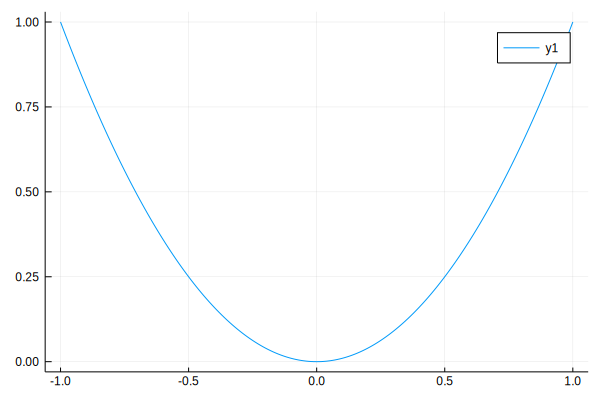

In [19]:
f(x) = x^2
Df(x) = 2*x

# Lets plot the potential 
X = -1:0.01:1
plot(X, f.(X))

## 3.2 1D plots

Ok, it is nice and running. Now we would like to use the code that we developed in notebook 1. One possibility is of course copying it to this notebook, but if we want to use the code in different places this will quickly become cumbersome. 

A clever option is to put the code into a file and then *include* it. This is completely equivalent to running the code in the notebook, so we don't lose anything.

The third version of `gradient_descent` is saved into the file `GradientDescent.jl`; you may check it. Let us include it and test it:

In [20]:
include("GradientDescent.jl")

xn, fn = gradient_descent(f, Df, 1., alpha = 0.1, verbose = true);

Iter. 100,	x = 2.0370359763344877e-10,	f(x) = 4.1495155688809995e-20


Great! Let's plot $f_n$ with respect to the number of iterations

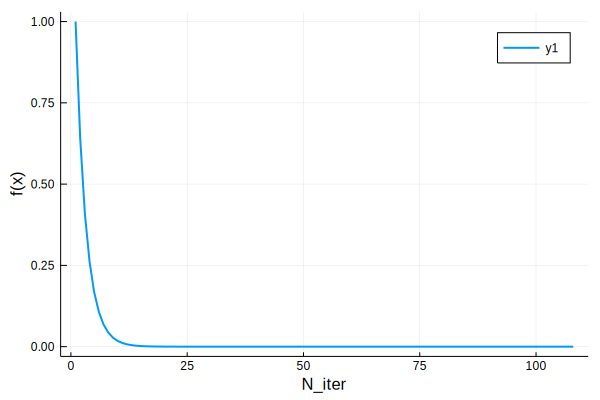

In [5]:
plot1 = plot(1:length(fn), fn,linewidth=2)
xlabel!("N_iter")
ylabel!("f(x)")

Impresive! Note that we use `xlabel!` because, in some way, we are *modifying* an existing object: the plot! 

Great, but since the curve is so steep we would also like to have some log plot. 

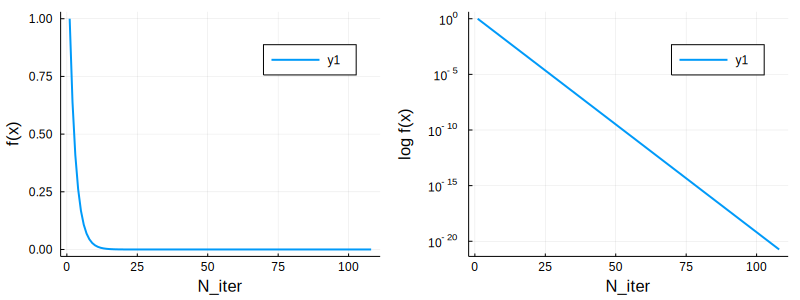

In [6]:
plot2 = plot(1:length(fn), fn, yscale = :log10, linewidth = 2)
xlabel!("N_iter")
ylabel!("log f(x)")
plot(plot1, plot2,size = (800,300))

So the convergence of the gradient descent is (at least for this example) exponential! Good. We can also visualize it on top of $f(x)$:

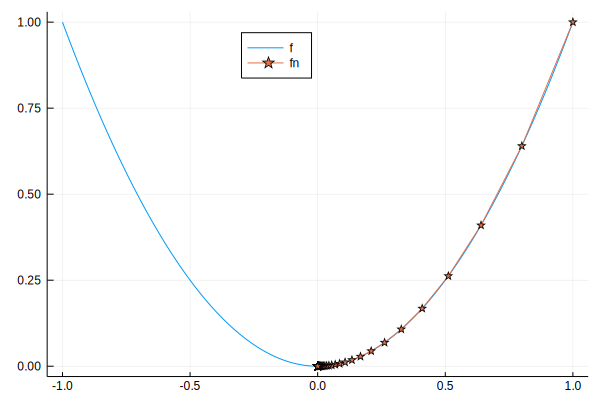

In [7]:
plot(X, f.(X),label="f")
plot!(xn, fn,marker=:star,label="fn",legend=:top)

You may have noticed those strange names with two dots in front, like `:log10` or `:star`. They are *symbols*, and ... ***explain more***

## 3.3 Contour plots

Since we already have a gradient descent that runs for multidimensional input let's do some contourplots:

In [22]:
g(x) = x[1]^2 + 2*x[2]^2
Dg(x) = [2*x[1], 4*x[2]]

x0 = [0.9, 0.9]
xn, fn = gradient_descent(g, Dg, x0, alpha = 0.1, maxiter = 20, verbose = true); 
# We can add a semicolon at the end of a statement to mute the output

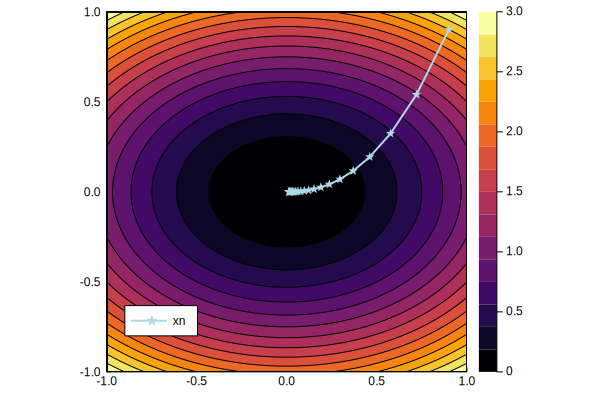

In [48]:
G = [g([x, y]) for y in X, x in X]

contourf(X, X, G)
plot!(xn[:,1],xn[:,2],linewidth=2,marker = :star,markerstrokecolor=:lightblue,color=:lightblue,markersize=5,
        aspect_ratio=:equal,legend=:bottomleft,label="xn")
xlims!(-1,1)
ylims!(-1,1)

# 3.4 Gifs and animation

With `Plots.jl`, gifs are trivial to do. Check the following example, in which we animate the still contourplot above:

┌ Info: Saved animation to 
│   fn = /home/ismael/proyectos/julia_tutorial/tmp.gif
└ @ Plots /home/ismael/.julia/packages/Plots/12uaJ/src/animation.jl:98


Plots.AnimatedGif("/home/ismael/proyectos/julia_tutorial/tmp.gif")
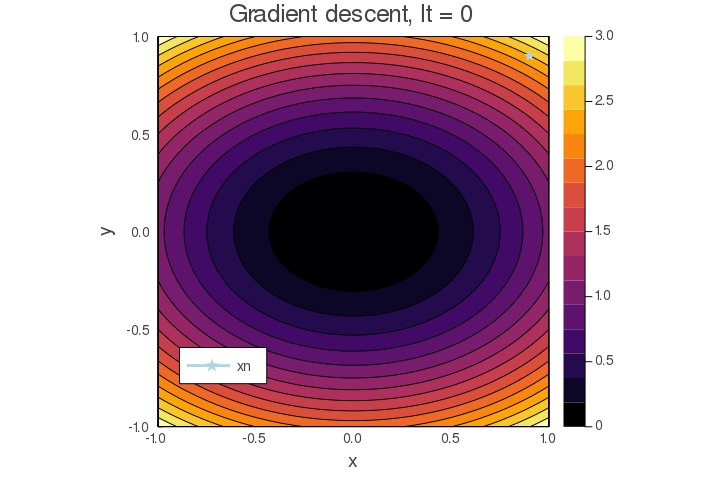

In [49]:
@gif for i in 1:length(fn)
    contourf(X, X, G, dpi = 120)  # We changed the color palette for aesthetic reasons
    
    plot!(xn[1:i,1],xn[1:i,2],linewidth=2,marker = :star,markerstrokecolor=:lightblue,color=:lightblue,markersize=5,
        aspect_ratio=:equal,legend=:bottomleft,label="xn")
    xlabel!("x")
    ylabel!("y")
    xlims!(-1,1)
    ylims!(-1,1)
    title!("Gradient descent, It = $(i-1)")
end
# If you are really interested into doing animations you should check the more powerful macro @animate
# You can find some examples here: https://docs.juliaplots.org/latest/animations/

As you see, we have placed a `@gif`, and this *macro* takes care of all the work. Macros take the code that you write and wrap it in some code of their own, to offer some result in a very simple fashion. An even more important macro is `@time`, which is used to measure the time elapsed in running some code:

In [16]:
@time gradient_descent(f, Df, 1., alpha = 0.1, verbose = false);

  0.000055 seconds (138 allocations: 8.594 KiB)


# 3.5 3d and interactive plots

Though `gr` is a neat plots backend, it might come a bit basic for some needs. Another very powerful plot backend is `plotly`, which brings more interactivity:

In [52]:
plotly() # you may have to install it

G = [g([x, y]) for y in X, x in X]
surface(X, X, G, alpha = 0.8,size = (500,600))
xlabel!("x")
ylabel!("y")

plot!(xn[:,1],xn[:,2],fn,color=:lightblue,markersize = 1,marker = :circle,
      markerstrokecolor=:lightblue,linewidth = 3,label="xn",legend=:topleft)

<!DOCTYPE html>
 
 
 Plots.jl

In [13]:
fn

21-element Array{Float64,1}:
 2.43                  
 1.1016                
 0.541728              
 0.28791935999999996   
 0.16310522879999997   
 0.09676860825599998   
 0.05918916354047998   
 0.03689367619829759   
 0.023256492918570997  
 0.014756189922483235  
 0.009397893954044475  
 0.005998067795904339  
 0.003832793028892492  
 0.0024508382087161324 
 0.0015677626948593021 
 0.001003089571571105  
 0.0006418770466755221 
 0.0004107652093855394 
 0.0002628767378314991 
 0.0001682364335890708 
 0.00010766963319269343

# Bonus 1: finetuning animations

For saving the animation that appeared at the beginning of the course I used the macro `@animate`. This is the whole code:

In [53]:
gr()
anim = @animate for i in 1:length(fn)
    contourf(X, X, G,dpi = 120,aspect_ratio = :equal)
    
    plot!(xn[1:i,1],xn[1:i,2],linewidth=2,marker = :star,markerstrokecolor=:lightblue,color=:lightblue,markersize=5,
        aspect_ratio=:equal,legend=:bottomleft,label="xn")
    xlabel!("x")
    ylabel!("y")
    xlims!(-1,1)
    ylims!(-1,1)
    title!("Contourplot and gradient descent, It = $(i-1)")
end

Animation("/tmp/jl_9VhPAP", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000012.png", "000013.png", "000014.png", "000015.png", "000016.png", "000017.png", "000018.png", "000019.png", "000020.png", "000021.png"])

┌ Info: Saved animation to 
│   fn = /home/ismael/proyectos/julia_tutorial/gradient_descent.gif
└ @ Plots /home/ismael/.julia/packages/Plots/12uaJ/src/animation.jl:98


Plots.AnimatedGif("/home/ismael/proyectos/julia_tutorial/gradient_descent.gif")
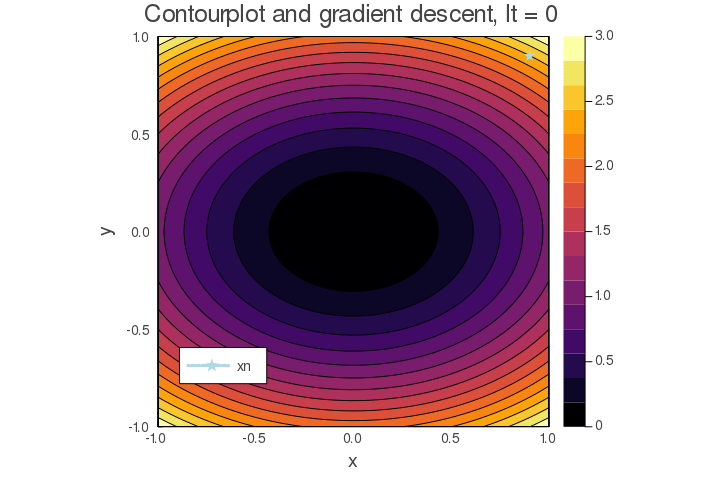

In [54]:
gif(anim, "gradient_descent.gif",fps = 2)

# Bonus 2: Advanced performance measuring

An even more powerful macro for measuring performance is `@benchmark`, provided in the package `BenchmarkTools`. Using it you can get more robust measures about the time and memory consumption of a program, as well as detailed statistics. 

In [42]:
#Pkg.add("BenchmarkTools") # install it if you don't have it already
using BenchmarkTools: @benchmark

@benchmark gradient_descent($f, $Df, 1.) 

BenchmarkTools.Trial: 
  memory estimate:  8.14 KiB
  allocs estimate:  126
  --------------
  minimum time:     4.315 μs (0.00% GC)
  median time:      5.224 μs (0.00% GC)
  mean time:        6.077 μs (10.28% GC)
  maximum time:     475.529 μs (98.71% GC)
  --------------
  samples:          10000
  evals/sample:     8